In [2]:
from arcgis import GIS
from arcgis.raster import ImageryLayer

gis = GIS()

gis.users.me

In [3]:
il =  ImageryLayer(url = 'https://imageserver.imagery.esri.com/arcgis/rest/services/Applanix/West_Coast_Oblique_10mDEM_Applanix/ImageServer', 
                   gis = gis
)

In [4]:
il_qlyr = il.query()

In [5]:
il_qlyr.sdf

C:\Users\greg6750\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\IPython\lib\pretty.py:402: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  return _repr_pprint(obj, self, cycle)
C:\Users\greg6750\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\pandas\io\formats\html.py:606: FutureWarning: 'ExtensionArray._formatting_values' is deprecated. Specify 'ExtensionArray._formatter' instead.
  super().render()


,OBJECTID,Name,MinPS,MaxPS,LowPS,HighPS,Category,Tag,GroupName,ProductName,CenterX,CenterY,ZOrder,Shape_Length,Shape_Area,SHAPE
0,2,2016obP03977724,0,0.000053,0.000003,0.000005,1,Dataset,DSS439,Applanix,-121.988987,36.952483,None,0.063899,0.000242,"{""rings"": [[[-121.98819091099995, 36.944054575..."
1,3,2016obP03977733,0,0.000051,0.000003,0.000005,1,Dataset,DSS439,Applanix,-121.981617,36.956072,None,0.061486,0.000224,"{""rings"": [[[-121.98128049799999, 36.947953167..."
2,4,2016obP03977742,0,0.000046,0.000002,0.000005,1,Dataset,DSS439,Applanix,-121.974530,36.957555,None,0.054073,0.000174,"{""rings"": [[[-121.97401068599999, 36.950498802..."
3,5,2016obP03977751,0,0.000048,0.000002,0.000005,1,Dataset,DSS439,Applanix,-121.969592,36.962886,None,0.056725,0.000190,"{""rings"": [[[-121.96879775399998, 36.955488494..."
4,6,2016obP03977760,0,0.000041,0.000002,0.000004,1,Dataset,DSS439,Applanix,-121.962042,36.965200,None,0.048841,0.000143,"{""rings"": [[[-121.96143355299995, 36.958779181..."
5,7,2016obP03977769,0,0.000042,0.000002,0.000004,1,Dataset,DSS439,Applanix,-121.957786,36.970445,None,0.049470,0.000146,"{""rings"": [[[-121.95678671899998, 36.963984242..."
6,8,2016obP03977778,0,0.000041,0.000002,0.000004,1,Dataset,DSS439,Applanix,-121.955198,36.975545,None,0.050129,0.000152,"{""rings"": [[[-121.95262026499995, 36.969195628..."
7,9,2016obP03982401,0,0.000050,0.000002,0.000005,1,Dataset,DSS439,Applanix,-123.026123,38.002037,None,0.064957,0.000244,"{""rings"": [[[-123.02161450799997, 37.994688122..."
8,10,2016obP03982410,0,0.000046,0.000002,0.000005,1,Dataset,DSS439,Applanix,-123.021215,38.000583,None,0.062272,0.000225,"{""rings"": [[[-123.01560232099996, 37.993972999..."
9,11,2016obP03982419,0,0.000039,0.000002,0.000004,1,Dataset,DSS439,Applanix,-123.014365,37.997835,None,0.055778,0.000184,"{""rings"": [[[-123.00862539499997, 37.992037436..."


In [15]:
image_1 = il.catalog_item(5)

In [16]:
image_1

<RasterCatalogItem at https://imageserver.imagery.esri.com/arcgis/rest/services/Applanix/West_Coast_Oblique_10mDEM_Applanix/ImageServer/5>

In [17]:
image_1.ics['ics']['extent']

{'xmin': 590673.002049837,
 'ymin': 4090343.0297480193,
 'xmax': 592606.8570169789,
 'ymax': 4092303.933715746,
 'spatialReference': {'wkid': 32610, 'latestWkid': 32610}}

In [36]:
assert image_1.info['extent']==image_1.ics['ics']['extent']

# Viewing in Image Coordinate Space

Use the ```image.ics``` to project to image coordinate space.

In [18]:
from IPython.display import Image

im_ics = image_1.image(return_format='image',
                  bbox = image_1.ics['ics']['extent'],
                  image_sr=image_1.ics
)

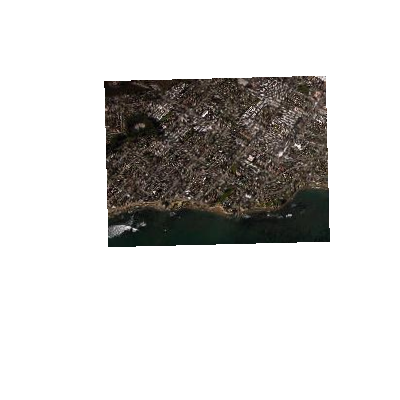

In [19]:
Image(im_ics)

In [20]:
im_ics

'C:\\Users\\greg6750\\AppData\\Local\\Temp\\14\\d15e51d53c004fe7937b102ce595d719.png'

# Viewing in Geographic Coordinate Space

If I don't specify an ```image_sr```, the image will come back in geographic coordinate space.

In [21]:
im_gcs = image_1.image(return_format='image',
                  bbox = image_1.ics['ics']['extent'],
)

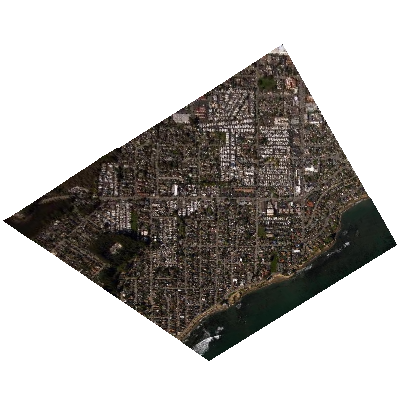

In [22]:
Image(im_gcs)

In [34]:
im_gcs

'C:\\Users\\greg6750\\AppData\\Local\\Temp\\14\\c76ac74bdfef42bfa0330c23c55ad145.png'

In [ ]:
m = gis.map('California', )